In [1]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
"""

import sys
import numpy   as np
import cantera as ct

In [2]:
gas = ct.Solution('gri30.yaml')

# gas.TPX = 1700.0, ct.one_atm, 'H2:2,O2:1,N2:4'
# #gas.TPX = 700, ct.one_atm, 'CH4:1.0,O2:1.0'

gas.TP  = 1850.0, ct.one_atm
gas.set_equivalence_ratio(.5, 'H2:1.0', 'O2:1.0, N2:4.0')

r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
sim.verbose = True

# limit advance when temperature difference is exceeded
delta_T_max = 5.
r.set_advance_limit('temperature', delta_T_max)

# dt_max = 1.e-5
# t_end = 100 * dt_max

# # T = 700.0
# dt_max0     = 5.e1 #1.e1
# dt_max      = 5.e0 #1.e-2
# t_end       = 5.e3 #2.e3
# # T = 800.0
# dt_max0     = 5.e0 #1.e1
# dt_max      = 1.e0 #1.e-2
# t_end       = 5.e1 #2.e3
# # T = 900.0
# dt_max0     = 1.e-1
# dt_max      = 1.e-2
# t_end       = 5.e-1
# # T = 1000.0
# dt_max0     = 1.e-4
# dt_max      = 1.e-5
# t_end       = 5.e-3
# # T = 1200.0
# dt_max0     = 1.e-5
# dt_max      = 1.e-6
# t_end       = 5.e-3
# # T = 1500.0
# dt_max0     = 5.e-6
# dt_max      = 5.e-7
# t_end       = 5.e-3
# T = 1700.0
# dt_max0     = 1.e-6
# dt_max      = 1.e-7
# t_end       = 5.e-2
T = 1850.0
dt_max0     = 5.e-7
dt_max      = 5.e-8
t_end       = 5.e-2
# T = 2000.0
# dt_max0     = 5.e-7
# dt_max      = 5.e-8
# t_end       = 1.e-2

#[5.e-2, 1.e-4, 1.e-5, 5.e-6, 1.e-6]
#[5.e-1, 1.e-2, 1.e-3, 5.e-3, 5.e-3]
#[5.e-3, 1.e-5, 1.e-6, 5.e-7, 1.e-7]

StretchFact = 1.01
states      = ct.SolutionArray(gas, extra=['t'])

Initializing reactor network.
Reactor 0: 55 variables.
              0 sensitivity params.
Number of equations: 55
Maximum time step:                0


In [3]:
#print('{:10s} {:10s} {:10s} {:14s}'.format('t [s]', 'T [K]', 'P [Pa]', 'u [J/kg]'))
First = True
while sim.time < t_end:
    if First:
        dt_max_now = dt_max0
    sim.advance(sim.time + dt_max_now)
    states.append(r.thermo.state, t=sim.time)
    if First:
        dt_max_now = dt_max
        First      = False
    dt_max_now *= StretchFact
#     print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(sim.time, r.T, r.thermo.P, r.thermo.u))

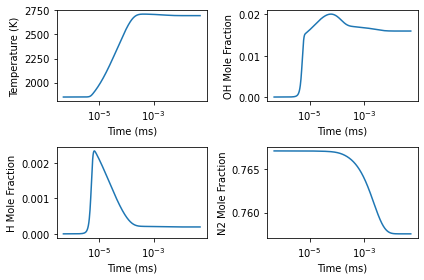

In [4]:
import matplotlib.pyplot as plt

plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
# plt.xlim([0.4,0.5])

Var = 'OH' #'CH4' #
plt.subplot(2, 2, 2)
plt.plot(states.t, states.Y[:, gas.species_index(Var)])
plt.xlabel('Time (ms)')
plt.ylabel(Var+' Mole Fraction')
plt.xscale('log')
# plt.xlim([0.4,0.5])

Var = 'H' #'CO' #
plt.subplot(2, 2, 3)
plt.plot(states.t, states.Y[:, gas.species_index(Var)])
plt.xlabel('Time (ms)')
plt.ylabel(Var+' Mole Fraction')
plt.xscale('log')
# plt.xlim([0.4,0.5])

Var = 'N2'#'CH' #
plt.subplot(2, 2, 4)
plt.plot(states.t, states.Y[:, gas.species_index(Var)])
plt.xlabel('Time (ms)')
plt.ylabel(Var+' Mole Fraction')
plt.xscale('log')
#plt.xlim([1.e-4,1.e-3])

plt.tight_layout()
plt.show()

In [8]:
TVec  = np.array([700, 800, 900, 1000, 1200, 1500, 1700, 1850, 2000])
tVec1 = np.array([5.e1, 5.e0, 1.e-1, 1.e-4, 1.e-5, 5.e-6, 1.e-6, 5.e-7, 5.e-7])
tVec2 = np.array([5.e0, 1.e0, 1.e-2, 1.e-5, 1.e-6, 5.e-7, 1.e-7, 5.e-8, 5.e-8])
tVec3 = np.array([1.e4, 1.e2, 1.e0, 1.e-1, 5.e-2, 1.e-2, 1.e-1, 5.e-2, 1.e-2])

plt.plot(1000/TVec, tVec1, '-o')
plt.plot(1000/TVec, tVec2, '-o')
plt.plot(1000/TVec, tVec3, '-o')
plt.yscale('log')

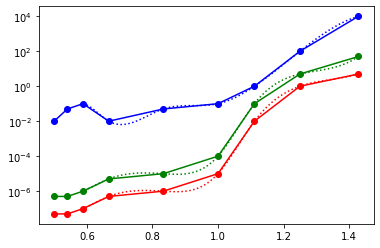

In [10]:
from scipy.interpolate import interp1d

TVec  = np.array([700, 800, 900, 1000, 1200, 1500, 1700, 1850, 2000])
tVec1 = np.array([5.e1, 5.e0, 1.e-1, 1.e-4, 1.e-5, 5.e-6, 1.e-6, 5.e-7, 5.e-7])
tVec2 = np.array([5.e0, 1.e0, 1.e-2, 1.e-5, 1.e-6, 5.e-7, 1.e-7, 5.e-8, 5.e-8])
tVec3 = np.array([1.e4, 1.e2, 1.e0, 1.e-1, 5.e-2, 1.e-2, 1.e-1, 5.e-2, 1.e-2])

f1 = interp1d(1000/TVec, np.log10(tVec1), kind='cubic')
f2 = interp1d(1000/TVec, np.log10(tVec2), kind='cubic')
f3 = interp1d(1000/TVec, np.log10(tVec3), kind='cubic')

oT = np.linspace(700, 1700, 100)

plt.plot(1000/TVec, tVec1, 'g-o')
plt.plot(1000/oT, 10**f1(1000/oT), 'g:')

plt.plot(1000/TVec, tVec2, 'r-o')
plt.plot(1000/oT, 10**f2(1000/oT), 'r:')

plt.plot(1000/TVec, tVec3, 'b-o')
plt.plot(1000/oT, 10**f3(1000/oT), 'b:')

plt.yscale('log')